### 1)Imagine you are helping to organize a fitness program and have a list of daily steps taken by
participants: [3000, 7000, 10000, 12000, 15000]. You want to categorize these step counts into
three groups: 'Low Activity,' 'Moderate Activity,' and 'High Activity.' Write a Python function
that bins the step counts into these categories based on the following ranges: 'Low Activity':
0-5000, 'Moderate Activity': 5001-10000, 'High Activity': 10001 and above.

### 2)You are a data analyst working for a global nonprofit organization dedicated to enhancing
well-being and happiness across the world. Your organization seeks to identify the key factors
that influence happiness in various countries and regions. To support this mission, you have
access to the Kaggle World Happiness Report Dataset. Your objective is to perform data
preprocessing and exploratory data analysis to extract meaningful insights that can inform your
organization's strategic initiatives.


In [5]:
import numpy as np
import pandas as pd

In [312]:
def csteps(steps):
    arrcount = []
    for x in steps:
        if 0 <= x  & x <= 5000:
            arrcount.append('Low Activity')
        elif 5001 <= x  & x<= 10000:
            arrcount.append('Moderate Activity')
        elif x >= 10001:
            arrcount.append('High Activity')
        else:
            arrcount.append('Invalid')  

    return arrcount

group_arr = [3000, 7000, 10000, 12000, 15000]
categories = csteps(group_arr)
print(categories)

['Low Activity', 'Moderate Activity', 'Moderate Activity', 'High Activity', 'High Activity']


In [9]:
# 2nd one
# Data Loading 
dataset=pd.read_csv('2016.csv')
print (dataset)

         Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460                      7.592   
1              

In [35]:
#data inspection
entire=dataset.size
print("the totel cell are",entire)
#row and column shape
rc=dataset.shape
print("the row and cols:",rc)
cols=dataset.shape[1]
print("the colss:",cols)
row=dataset.shape[0]
print("the rows:",row)

# let get the columns of the datasets
cols=dataset.columns
print("the colNames:",cols)

#know the dtype
print(dataset.dtypes)

the totel cell are 2041
the row and cols: (157, 13)
the colss: 13
the rows: 157
the colNames: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [51]:
#Missing Values:Identify and quantify any missing values in the dataset. Which columns contain missing data?

#let fetch the missing values from the dataset

#missing_Values=dataset.isnull().any()
#missing_Values
missing_Values=dataset.isnull().sum()
missing_Values #indicates no missing values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [314]:
#Binning:Create bins for the 'Happiness Score' column to classify countries into 'Low 
#Happiness,' 'Medium Happiness,' and 'High Happiness' categories.

cols=dataset.columns
#print("the colNames:",cols)
labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']
# let know min and max
max = dataset['Happiness Score'].max()
min = dataset['Happiness Score'].min()
#--------------------------------------
print("Max Happiness Score:", max)
print("Min Happiness Score:", min)
#------------------------------------------
bins = pd.cut(dataset['Happiness Score'], bins=3, labels=labels)
dataset['HappinesBinning'] = bins
print(dataset[['Happiness Score', 'HappinesBinning']].head())
print(dataset.columns)

Max Happiness Score: 7.526
Min Happiness Score: 2.905
   Happiness Score HappinesBinning
0            7.526  High Happiness
1            7.509  High Happiness
2            7.501  High Happiness
3            7.498  High Happiness
4            7.413  High Happiness
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Category', 'HappinessCategory',
       'HappinesBinning', 'Economy_scaler'],
      dtype='object')


In [113]:
dataset['Economy (GDP per Capita)'].values.reshape(-1,1)
a=dataset['Economy (GDP per Capita)']
print(a)

0      1.44178
1      1.52733
2      1.42666
3      1.57744
4      1.40598
        ...   
152    0.39499
153    0.38227
154    0.28123
155    0.74719
156    0.06831
Name: Economy (GDP per Capita), Length: 157, dtype: float64


### One-Hot Encoding:
###Apply one-hot encoding to the 'Region' column to transform it into numerical values.
### Normalization:Normalize the 'Economy (GDP per Capita)' column using an appropriate
normalization technique (e.g., Min-Max scaling or Z-score scaling).

In [119]:
from sklearn.preprocessing import MinMaxScaler as scale
sc=scale()
dataset['Economy (GDP per Capita)_scaler']=sc.fit_transform(dataset['Economy (GDP per Capita)'].values.reshape(-1, 1))
dataset['Economy (GDP per Capita)_scaler']

0      0.790333
1      0.837228
2      0.782044
3      0.864697
4      0.770708
         ...   
152    0.216519
153    0.209547
154    0.154160
155    0.409583
156    0.037445
Name: Economy (GDP per Capita)_scaler, Length: 157, dtype: float64

### Chi-Square Test: Test for a significant association between the 'Region' and 'Happiness Rank'columns using a chi-square test, and interpret the findings.

### Covariance Matrix: Calculate the covariance matrix for a subset of numerical columns (e.g.,'Economy (GDP per Capita),' 'Family,' 'Health (Life Expectancy)'). Visualize the
### covariance matrix using a heatmap.

In [128]:
dataset['Region']
dataset['Happiness Rank']

0        1
1        2
2        3
3        4
4        5
      ... 
152    153
153    154
154    155
155    156
156    157
Name: Happiness Rank, Length: 157, dtype: int64

In [266]:
from sklearn.preprocessing import MinMaxScaler as MXS, StandardScaler as zscore
sc=MXS()
dataset['Economy_scaler']=sc.fit_transform(dataset['Economy (GDP per Capita)'].values.reshape(-1, 1))
z=zscore()
#dataset['Economy (GDP per Capita)_scaler']=sc.fit_transform(dataset['Economy (GDP per Capita)'].values.reshape(-1, 1))

In [150]:
from scipy.stats import chi2_contingency as chii
ctable=pd.crosstab(dataset['Region'],dataset['Happiness Rank'])
chival,pvalue,dofvalue,evalue=chii(ctable)
print("the table is ",ctable)
print(chival,pvalue,dofvalue,exvalue) #p>0.05 accept the ho

the table is  Happiness Rank                   1    2    3    4    5    6    7    8    9    \
Region                                                                         
Australia and New Zealand          0    0    0    0    0    0    0    1    1   
Central and Eastern Europe         0    0    0    0    0    0    0    0    0   
Eastern Asia                       0    0    0    0    0    0    0    0    0   
Latin America and Caribbean        0    0    0    0    0    0    0    0    0   
Middle East and Northern Africa    0    0    0    0    0    0    0    0    0   
North America                      0    0    0    0    0    1    0    0    0   
Southeastern Asia                  0    0    0    0    0    0    0    0    0   
Southern Asia                      0    0    0    0    0    0    0    0    0   
Sub-Saharan Africa                 0    0    0    0    0    0    0    0    0   
Western Europe                     1    1    1    1    1    0    1    0    0   

Happiness Rank           

In [270]:
dataset['Health (Life Expectancy)']

0      0.79504
1      0.86303
2      0.86733
3      0.79579
4      0.81091
        ...   
152    0.21028
153    0.17344
154    0.24811
155    0.62994
156    0.15747
Name: Health (Life Expectancy), Length: 157, dtype: float64

In [274]:
sc=MXS()
dataset['Health Normalized'] = sc.fit_transform(dataset['Health (Life Expectancy)'])
plt.hist(dataset['Health Normalized'], color='green')
plt.title('Histogram of Health after scaling')
plt.xlabel('Health')
plt.ylabel('number')
plt.show()

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [160]:
print(dataset.dtypes)
dataset['Economy (GDP per Capita)']
dataset['Family']

Country                              object
Region                               object
Happiness Rank                        int64
Happiness Score                     float64
Lower Confidence Interval           float64
Upper Confidence Interval           float64
Economy (GDP per Capita)            float64
Family                              float64
Health (Life Expectancy)            float64
Freedom                             float64
Trust (Government Corruption)       float64
Generosity                          float64
Dystopia Residual                   float64
Happiness Category                 category
HappinessCategory                  category
HappinesBinning                    category
Economy (GDP per Capita)_scaler     float64
Economy_scaler                      float64
dtype: object


0      1.16374
1      1.14524
2      1.18326
3      1.12690
4      1.13464
        ...   
152    0.10419
153    0.11037
154    0.00000
155    0.14866
156    0.23442
Name: Family, Length: 157, dtype: float64

In [ ]:
Calculate the covariance matrix for a subset of numerical columns (e.g.,
'Economy (GDP per Capita),' 'Family,' 'Health (Life Expectancy)'). Visualize the
covariance matrix using a heatmap.

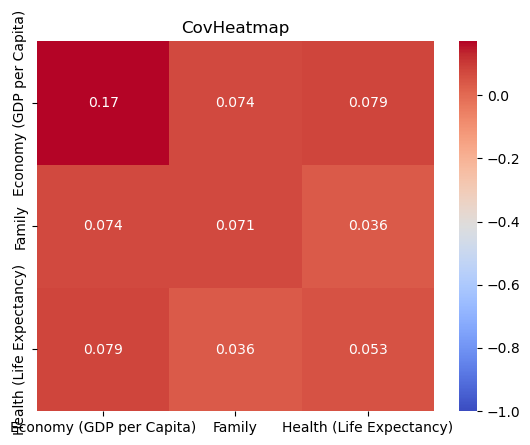

In [184]:

import seaborn as sns
import matplotlib.pyplot as plt
subsetnumcolumns = ['Economy (GDP per Capita)','Family', 'Health (Life Expectancy)']

cov_matrix = dataset[subsetnumcolumns].cov()
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', vmin='-1')
plt.title('CovHeatmap')
plt.show()

In [190]:
dataset.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Category', 'HappinessCategory',
       'HappinesBinning', 'Economy_scaler'],
      dtype='object')

In [188]:
### Visualization:
○ Generate the following visualizations:
■ A bar chart showing the count of countries in each 'Happiness Score'
category.
■ A histogram of the 'Health (Life Expectancy)' feature after normalization.
■ A stacked bar chart depicting the distribution of 'Region' by 'Happiness
Score' category.
■ A heatmap of the covariance matrix.

In [250]:

dataset['Country']

dataset['Happiness Score'].value_counts()


Happiness Score
5.835    2
6.379    2
3.739    2
7.526    1
4.754    1
        ..
5.919    1
5.897    1
5.856    1
5.822    1
2.905    1
Name: count, Length: 154, dtype: int64

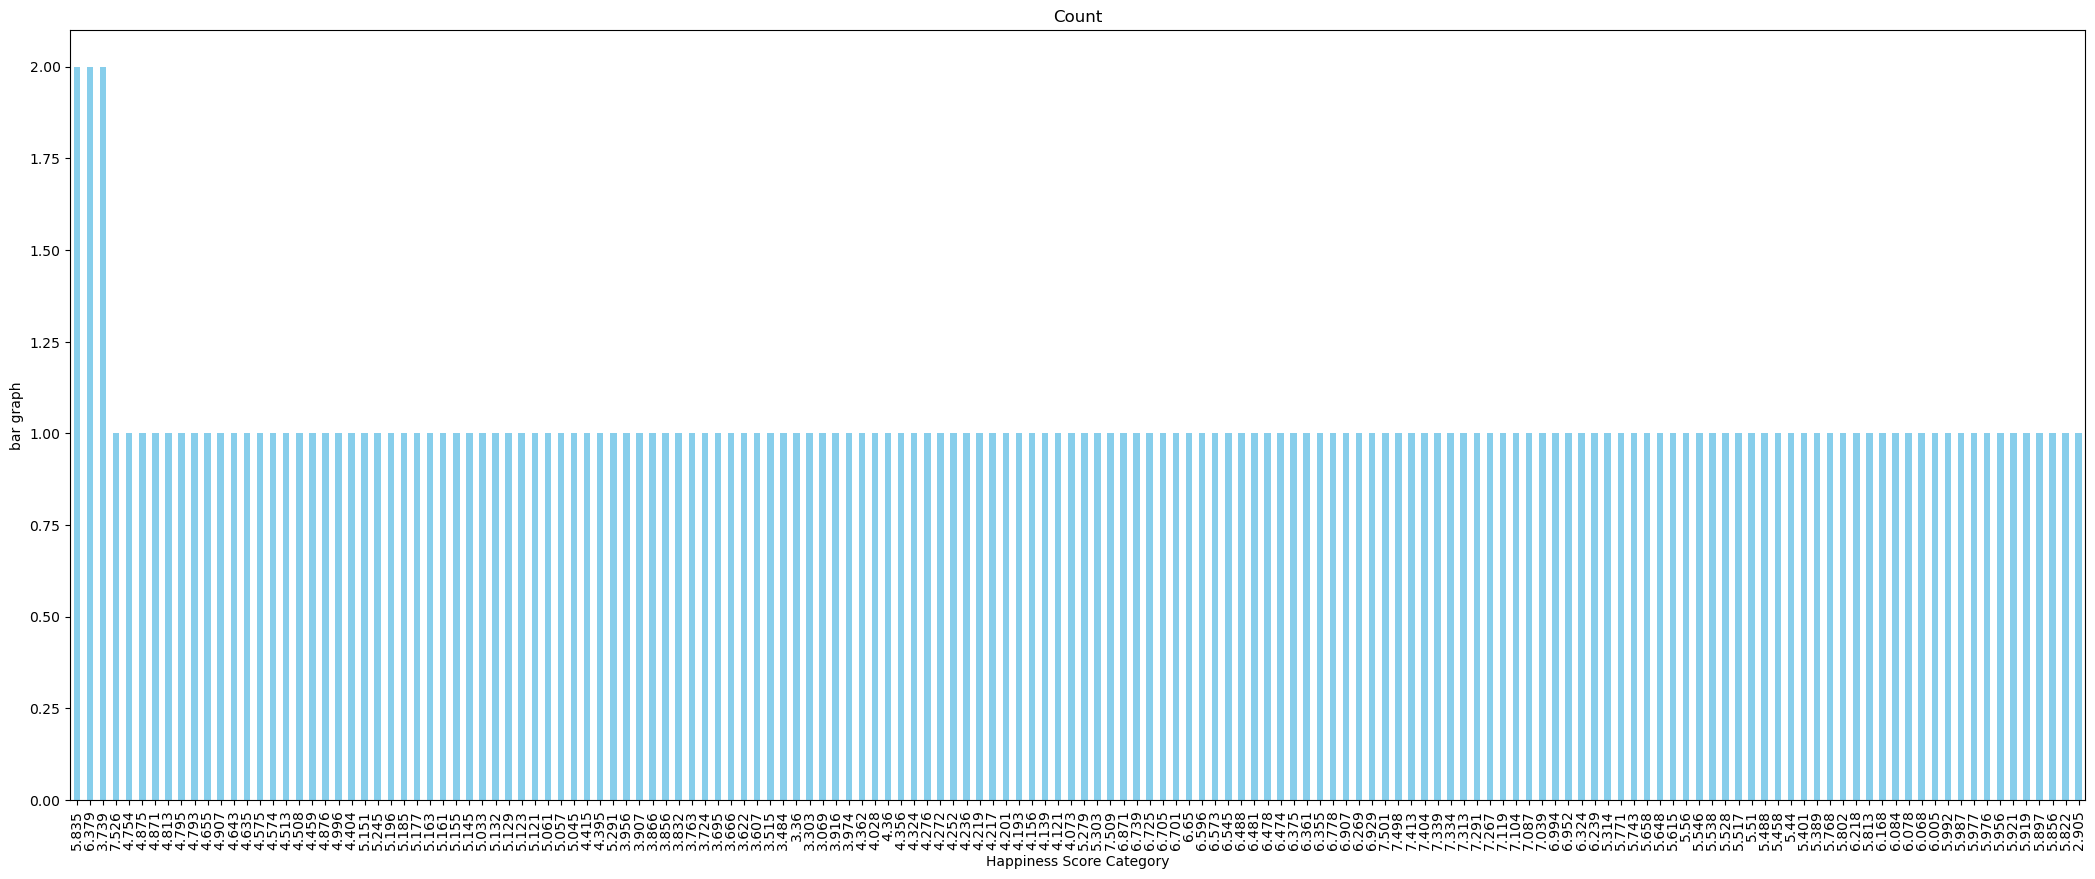

In [308]:
plt.figure(figsize=(26, 10))
dataset['Happiness Score'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count')
plt.xlabel('Happiness Score Category')
plt.ylabel('bar graph')
plt.show()


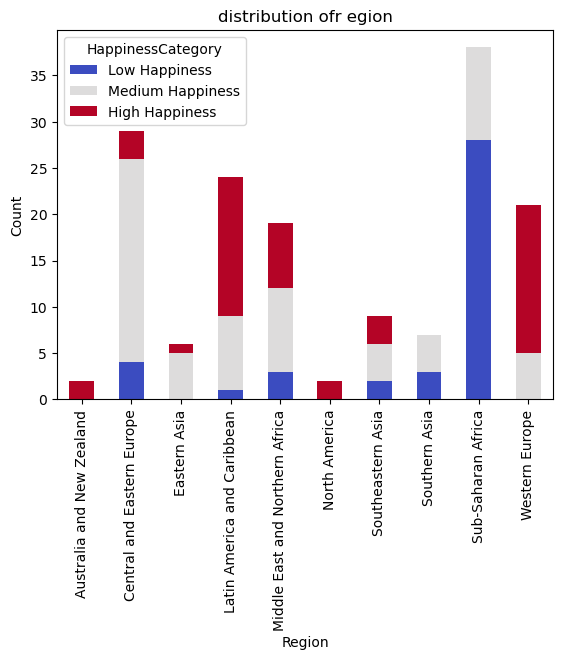

In [300]:
c=['pink','black','green']
region_happiness = pd.crosstab(dataset['Region'], dataset['HappinessCategory'])
region_happiness.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('distribution ofr egion')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


In [284]:
dataset.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Category', 'HappinessCategory',
       'HappinesBinning', 'Economy_scaler'],
      dtype='object')